In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

In [3]:
data = []
internal_energy = []
heat_capacity = []
magnetization = []
susceptivity = []
for i in range(20):
    temp = 0.5 + i * 1.5/20.
    d = np.loadtxt(f"data/6.1-gibbs-{temp}.dat")
    internal_energy.append(blocks_value(d[:, 0]))
    #heat_capacity.append(blocks_value((d[:, 1] - internal_energy[i][:, 0] * internal_energy[i][:, 0])) * 50 / (temp * temp))
    heat_capacity.append(blocks_value(d[:, 1] - internal_energy[i][:, 0] * internal_energy[i][:, 0] * 50) / (temp * temp))
    magnetization.append(blocks_value(d[:, 2]))
    susceptivity.append(blocks_value(d[:, 3]))
    data.append(d)
internal_energy = np.array(internal_energy)
heat_capacity = np.array(heat_capacity)
magnetization = np.array(magnetization)
susceptivity = np.array(susceptivity)

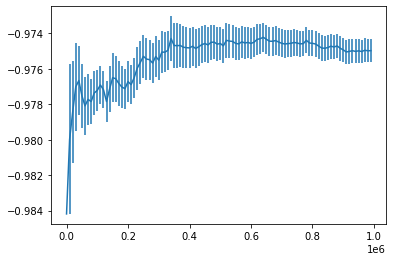

In [4]:
x = np.arange(100) * 10000
plt.errorbar(x, internal_energy[0, :, 0], yerr=internal_energy[0, :, 1])
plt.plot();

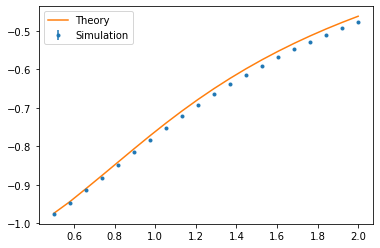

In [5]:
T = np.linspace(0.5, 2., 20)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.errorbar(T, internal_energy[:, -1, 0], yerr=internal_energy[:, -1, 1], marker=".", ls="none", label="Simulation")
plt.plot(T, e, label="Theory")
plt.legend()
plt.show();

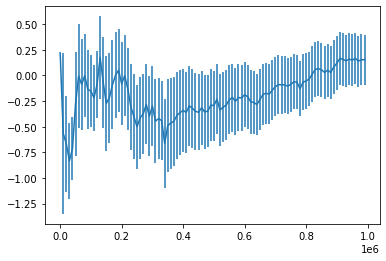

In [6]:
x = np.arange(100) * 10000
plt.errorbar(x, heat_capacity[0, :, 0], yerr=heat_capacity[0, :, 1])
plt.plot();

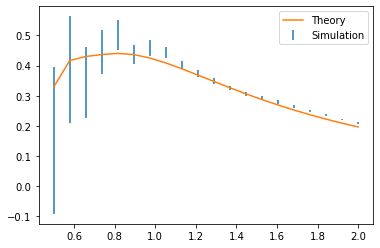

In [12]:
T = np.linspace(0.5, 2., 20)
beta = 1/T
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.errorbar(T, heat_capacity[:, -1, 0], yerr=heat_capacity[:, -1, 1], ls="none", label="Simulation")
plt.plot(T, heat, label="Theory")
plt.legend()
plt.show();

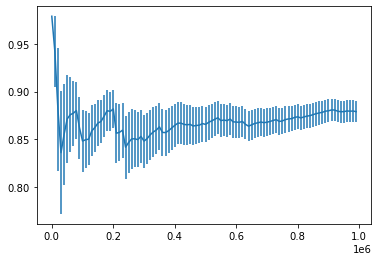

In [14]:
x = np.arange(100) * 10000

plt.errorbar(x, magnetization[0, :, 0], yerr=magnetization[0, :, 1], label="Simulation")
plt.plot();

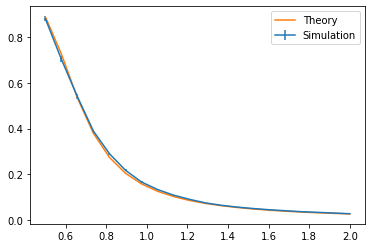

In [16]:
T = np.linspace(0.5, 2., 20)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.errorbar(T, magnetization[:, -1, 0], yerr=magnetization[:, -1, 1], label="Simulation")
plt.plot(T, M, label="Theory")
plt.legend()
plt.show();

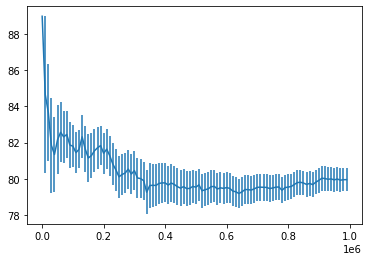

In [10]:
x = np.arange(100) * 10000
plt.errorbar(x, susceptivity[0, :, 0], yerr=susceptivity[0, :, 1])
plt.plot();

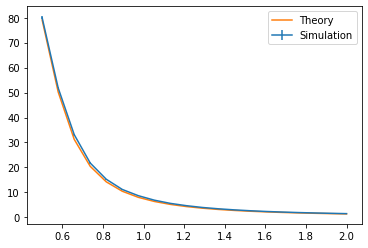

In [11]:
T = np.linspace(0.5, 2., 20)
beta = 1/T
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.errorbar(T, susceptivity[:, -1, 0], yerr=susceptivity[:, -1, 1], label="Simulation")
plt.plot(T, X, label="Theory")
plt.legend()
plt.show();